## Course Project: Text Classification with Rakuten France Product Data

The project focuses on the topic of large-scale product type code text classification where the goal is to predict each product’s type code as defined in the catalog of Rakuten France. This project is derived from a data challenge proposed by Rakuten Institute of Technology, Paris. Details of the data challenge is [available in this link](https://challengedata.ens.fr/challenges/35).

The above data challenge focuses on multimodal product type code classification using text and image data. **For this project we will work with only text part of the data.**

Please read carefully the description of the challenge provided in the above link. **You can disregard any information related to the image part of the data.**

### To obtain the data
You have to register yourself [in this link](https://challengedata.ens.fr/challenges/35) to get access to the data.

For this project you will only need the text data. Download the training files `x_train` and `y_train`, containing the item texts, and the corresponding product type code labels.

### Pandas for handling the data
The files you obtained are in CSV format. We strongly suggest to use Python Pandas package to load and visualize the data. [Here is a basic tutorial](https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/) on how to handle data in CSV file using Pandas.

If you open the `x_train` dataset using Pandas, you will find that it contains following columns:
1. an integer ID for the product
2. **designation** - The product title
3. description
4. productid
5. imageid

For this project we will only need the integer ID and the designation. You can [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) the other columns.

The training output file `y_train.csv` contains the **prdtypecode**, the target/output variable for the classification task, for each integer id in the training input file `X_train.csv`.

### Task for the break
1. Register yourself and download the training and test for text data. You do not need the `supplementary files` for this project.
2. Load the data using pandas and disregard unnecessary columns as mentioned above.
3. On the **designation** column, apply the preprocessing techniques.

### Task for the end of the course
After this preprocessing step, you have now access to a TF-IDF matrix that constitute our data set for the final evaluation project. The project guidelines are:
1. Apply all approaches taught in the course and practiced in lab sessions (Decision Trees, Bagging, Random forests, Boosting, Gradient Boosted Trees, AdaBoost, etc.) on this data set. The goal is to predict the target variable (prdtypecode).
2. Compare performances of all these models in terms of the weighted-f1 scores you can output. 
3. Conclude about the most appropriate approach on this data set for the predictive task. 
4. Write a report in .tex format that adress all these guidelines with a maximal page number of 5 (including figures, tables and references). We will take into account the quality of writing and presentation of the report.

In [1]:
import numpy as np
import pandas as pd
import spacy
import fr_core_news_sm

# Load spaCy for french
spacy_nlp = fr_core_news_sm.load()

In [2]:
# download data
X_train = pd.read_csv('data/X_train.csv')
Y_train = pd.read_csv('data/Y_train.csv')
X_test = pd.read_csv('data/X_test.csv')

In [3]:
# X_train.head()
# Y_train.head()
# X_test.head()

## Pre-processing

1. We only keep the designation and id. 
2. We normalize the accents, put the text in lower-case, remove the punctuation, tokenise the extracts

In [4]:
# designation and ids
def cleaning(X_train): 
    X_train = X_train.drop(['description', 'productid','imageid'], axis=1)
    X_train.columns = ['integer_id', 'designation']
    return X_train

In [5]:
def normalize_accent(string):
    string = string.replace('á', 'a')
    string = string.replace('â', 'a')

    string = string.replace('é', 'e')
    string = string.replace('è', 'e')
    string = string.replace('ê', 'e')
    string = string.replace('ë', 'e')

    string = string.replace('î', 'i')
    string = string.replace('ï', 'i')

    string = string.replace('ö', 'o')
    string = string.replace('ô', 'o')
    string = string.replace('ò', 'o')
    string = string.replace('ó', 'o')

    string = string.replace('ù', 'u')
    string = string.replace('û', 'u')
    string = string.replace('ü', 'u')

    string = string.replace('ç', 'c')
    
    return string

In [6]:
def raw_to_tokens(raw_string, spacy_nlp):
    # Write code for lower-casing
    string = raw_string.lower()
    
    # Write code to normalize the accents
    string = normalize_accent(string)
        
    # Write code to tokenize
    spacy_tokens = spacy_nlp(string)
        
    # Write code to remove punctuation tokens and create string tokens
    string_tokens = [token.orth_ for token in spacy_tokens if not token.is_punct if not token.is_stop]
    
    # Write code to join the tokens back into a single string
    clean_string = " ".join(string_tokens)
    
    return clean_string

### Apply pre-processing functions

N.B.: Section takes about ~20 min to run, skip-it if you have the pre-processed data folders. 

In [15]:
# X_train - step takes roughly ~15:30 min > Uncomment below to run text procesing
X_train = cleaning(X_train)
X_train['designation_cleaned'] = X_train['designation'].apply(lambda x: raw_to_tokens(x, spacy_nlp))

KeyboardInterrupt: 

In [ ]:
# X_test - step takes roughly ~2:20 min > Uncomment below to run text procesing
X_test = cleaning(X_test)
X_test['designation_cleaned'] = X_test['designation'].apply(lambda x: raw_to_tokens(x, spacy_nlp))

In [ ]:
# save folders to avoid re-processing everytime
X_train.to_csv(r(save_folder + 'data/X_train_cleaned.csv'), index = False, header=True)
X_test.to_csv(r(save_folder + 'data/X_test_cleaned.csv'), index = False, header=True)

## TF-IDF matrix

Construct the TF-IDF matrix from the pre-processed data. 

In [7]:
X_train = pd.read_csv('data/X_train_cleaned.csv')
X_test = pd.read_csv('data/X_test_cleaned.csv')

In [8]:
# create a list from the processed cells
doc_clean_train =  X_train['designation_cleaned'].astype('U').tolist()
doc_clean_test = X_test['designation_cleaned'].astype('U').tolist()
#doc_clean = doc_clean_train + doc_clean_test
doc_clean = doc_clean_train

In [9]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# convert raw documents into TF-IDF matrix.
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(doc_clean)

print("Shape of the TF-IDF Matrix:")
print(X_tfidf.shape)

Shape of the TF-IDF Matrix:
(84916, 79402)


### PCA of the TFIDF matrix 
We apply a PCA on the TF-IDF matrix to reduce the dimension. Given the matrix is very sparse, this improves the speed of the algorithms. We opt for **XY** principal components corresponding to 85% variance explained. Since the matrix is very sparse, Sparse PCA model is used. 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html

**Conclusion:** This model is not functional as it requires a lot of memory to store the dense array of size (98728, 86833). 

In [19]:
from sklearn.decomposition import SparsePCA

transformer = SparsePCA(n_components=5, random_state=0)
transformer.fit(X_tfidf.toarray())

X_transformed = transformer.transform(X_tfidf)
X_transformed.shape

# most values in the components_ are zero (sparsity)
np.mean(transformer.components_ == 0)

MemoryError: 

### Truncated SVD
Since PCA cannot be used here, truncated SVD, a method which is used to reduce the dimensions of TF-IDF matrices is applied on our matrix. We opt for **XY** principal components corresponding to 85% variance explained.

In [0]:
from sklearn.decomposition import TruncatedSVD

# number of chosen SVD components is 1000 only, it should be updated
SVD = TruncatedSVD(n_components = 1000, algorithm='arpack', random_state = 42)
X_transformed = SVD.fit_transform(X_tfidf)

print('Explained variance:')
print(SVD.explained_variance_ratio_.sum())
print(X_transformed.shape)

Explained variance:
0.3814342673501049
(98728, 1000)


<Figure size 720x576 with 0 Axes>

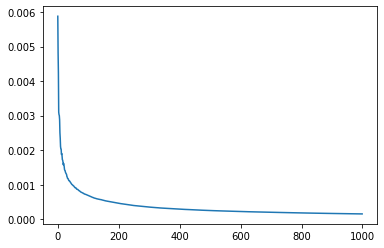

<Figure size 720x576 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
plt.plot(SVD.explained_variance_ratio_)
plt.figure(figsize=(10, 8))
# 1000 : 0.3814 variance explained 

### Use the TF-IDF matrix as the training set

If applicable, based on the applied transformations:
*   Define the X_train_T matrix as the truncated or TF-IDF matrix
*   Divide back in train and test



In [10]:
# if no transformation is applied i.e. no PCA / truncated SVD: 
X_transformed = X_tfidf
# print(X_transformed)

In [11]:
X_train_T = X_transformed[:84916]
X_test_T = X_transformed[84916:]

print(X_train_T.shape) # 84916
print(X_test_T.shape) # 13812

(84916, 79402)
(0, 79402)


## Apply various models to predict the target variable
1. Decision Trees
2. Bagging
3. Random forests
4. Boosting
5. Gradient Boosted Trees
6. AdaBoost, etc.

### Reduce the dataset to 10% of its initial size for faster training

The selection is done at random i.e. 10% of the training samples are chosen at random within the training set. Assuming the data is uniformly distributed.

In [12]:
# CHOOSE NUMBER OF SAMPLES TESTED
import math 
row, col = X_train.shape
N = math.ceil(row * 0.2) # 10% of the data
#N = 1000

In [13]:
# pick at random 10% of the total samples
import random 

rdsample = random.sample(range(1, row), N) 

X_train_sample = X_train_T[rdsample,]
Y_train_sample = Y_train.to_numpy()[rdsample,]
Y_train_sample = pd.DataFrame(Y_train_sample[:,1])

print(X_train_sample.shape)
print(Y_train_sample.shape)

(16984, 79402)
(16984, 1)


### 1. Decision trees - Ariel

1.   First parameters tried: { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'splitter':['best', 'random']} - **Optimal:** { 'criterion':['gini'],'max_depth': 14, 'splitter':['best']}
2.   Second parameters tried: { 'criterion':['gini','entropy'],'max_depth': np.arange(13, 30), 'splitter':['best', 'random']} - **Optimal:** { 'criterion':['gini'],'max_depth': 27, 'splitter':['random']}



In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(25, 35), 'splitter':['best', 'random']}
grid_dec_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = 5, scoring = 'f1_weighted', verbose=5, n_jobs=-1)
result = grid_dec_tree.fit(X_train_sample, Y_train_sample)

# update verbose to 2 for more steps
# add-in progress bar to evaluate time taken / time it will take
# https://infocenter.informationbuilders.com/wf80/index.jsp?topic=%2Fpubdocs%2FRStat16%2Fsource%2Ftopic47.htm

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.2min finished


In [22]:
# print results from grid search 
result.best_params_
# result.cv_results_

{'criterion': 'entropy', 'max_depth': 34, 'splitter': 'random'}

In [0]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(result.cv_results_),
    values='f1_weighted', index='parameters_max_depth', 
                       columns='parameters_criterion')
     
sns.heatmap(table)

In [0]:
from sklearn.model_selection import validation_curve

param_range = np.arange(50, 200, 5)
train_scores, test_scores = validation_curve(
                            DecisionTreeClassifier(criterion = 'gini', splitter = 'random'),
                            X = X_train_sample, y = Y_train_sample, scoring = "f1_weighted",
                            param_name = 'max_depth', 
                            param_range = param_range, cv = 5)

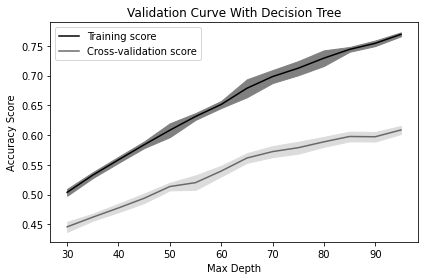

In [0]:
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [0]:
dec_tree = DecisionTreeClassifier(result.best_params_)
#result_model = dec_tree.fit(X_train_sample, Y_train_sample)
cross_val_score(dec_tree, X_train_sample, Y_train_sample, cv = 5, score = "f1_weighted")


In [0]:
# predict on X_test
Y_test = dec_tree.predict(X_test_T)

### 2. Random forests - Camille

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

parameters = {
    'bootstrap': [True, False], # whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree
    'max_depth': [None],
    # 'max_features': [None, auto], # "auto" = max_features=sqrt(n_features)
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2],
    'n_estimators': [10]} # flat validation curve - best at 15

rand_forest = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring = 'f1_weighted', verbose=5)
result = rand_forest.fit(X_train_sample, Y_train_sample)

In [0]:
from sklearn.model_selection import validation_curve

param_range = np.arange(5, 35, 5)
train_scores, test_scores = validation_curve(
                            RandomForestClassifier(bootstrap = True, min_samples_leaf = 2, min_samples_split = 2),
                            X = X_train_sample, y = Y_train_sample, scoring = "f1_weighted",
                            param_name = 'max_depth', 
                            param_range = param_range, cv = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

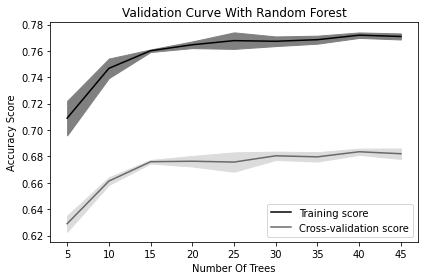

In [0]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [0]:
result.cv_results_

In [0]:
# print results from grid search 
result.best_params_
# result.cv_results_

In [0]:
rand_forest = RandomForestClassifier(result.best_params_)
#result_model = dec_tree.fit(X_train_sample, Y_train_sample)
cross_val_score(rand_forest, X_train_sample, Y_train_sample, cv = 5, score = "f1_weighted")
#dec_tree

### 3. Boosting - Niels

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

parameters = {
    'eta': [0.1, 0.3], 
    'max_depth': [100, 500],  
    'objective': ['multi:softmax'],  
    'num_class': np.arange(90, 100, 10)} 

model = GridSearchCV(xgb.XGBClassifier(), parameters, cv = 3, scoring = 'f1_weighted', verbose=100, n_jobs = -1) # , n_jobs = -1
result = model.fit(X_train_sample, Y_train_sample)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(149099,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(149099,), dtype=float64) to new file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_21796_2618043072\21796-2467917361672-0cee452189284a779b53048d64385857.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11322,), dtype=int32).
Pickling array (shape=(5662,), dtype=int32).
Pickling array (shape=(149099,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(149099,), dtype=float64) to old file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_21796_2618043072\21796-2467917361672-0cee452189284a779b53048d64385857.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11323,), dtype=int32).
Pickling array (shape=(5661,), dtype=int32).
Pickling array (shape=

In [ ]:
import xgboost as xgb
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

param_range = np.arange(0, 100, 20)
train_scores, test_scores = validation_curve(
                            xgb.XGBClassifier(eta = 0.1, objective = 'multi:softmax', num_class = 100),
                            X = X_train_sample, y = Y_train_sample.values.ravel(), scoring = "f1_weighted",
                            param_name = 'max_depth', 
                            param_range = param_range, cv = 3)

In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] eta=0.01, max_depth=3, num_class=5, objective=multi:softmax .....
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[CV]  eta=0.01, max_depth=3, num_class=5, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=5, objective=multi:softmax .....
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min remaining:    0.0s
[CV]  eta=0.01, max_depth=3, num_class=5, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=5, objective=multi:softmax .....
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.4min remaining:    0.0s
[CV]  eta=0.01, max_depth=3, num_class=5, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=5, objective=multi:softmax .....
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.1min remaining:    0.0s
[CV]  eta=0.01, max_depth=3, num_class=5, objective=multi:softmax, score=0.653, total= 3.8min
[CV] eta=0.01, max_depth=3, num_class=5, objective=multi:softmax .....
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 14.9min remaining:    0.0s
[CV]  eta=0.01, max_depth=3, num_class=5, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=10, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=10, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=10, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=10, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=10, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=15, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=15, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=15, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=15, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=15, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=15, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=15, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=15, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=15, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=15, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=20, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=20, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=20, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=20, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=20, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=20, objective=multi:softmax, score=0.648, total= 3.6min
[CV] eta=0.01, max_depth=3, num_class=20, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=20, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=20, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=20, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=25, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=25, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=25, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=25, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=25, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=25, objective=multi:softmax, score=0.648, total= 3.6min
[CV] eta=0.01, max_depth=3, num_class=25, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=25, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=25, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=25, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=30, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=30, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=30, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=30, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=30, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=30, objective=multi:softmax, score=0.648, total= 3.6min
[CV] eta=0.01, max_depth=3, num_class=30, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=30, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.01, max_depth=3, num_class=30, objective=multi:softmax ....
[CV]  eta=0.01, max_depth=3, num_class=30, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=5, objective=multi:softmax .....
[CV]  eta=0.05, max_depth=3, num_class=5, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=5, objective=multi:softmax .....
[CV]  eta=0.05, max_depth=3, num_class=5, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=5, objective=multi:softmax .....
[CV]  eta=0.05, max_depth=3, num_class=5, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=5, objective=multi:softmax .....
[CV]  eta=0.05, max_depth=3, num_class=5, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=5, objective=multi:softmax .....
[CV]  eta=0.05, max_depth=3, num_class=5, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.05, max_depth=3, num_class=10, objective=multi:softmax, score=0.648, total= 3.8min
[CV] eta=0.05, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.05, max_depth=3, num_class=10, objective=multi:softmax, score=0.651, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.05, max_depth=3, num_class=10, objective=multi:softmax, score=0.648, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.05, max_depth=3, num_class=10, objective=multi:softmax, score=0.653, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=10, objective=multi:softmax ....
[CV]  eta=0.05, max_depth=3, num_class=10, objective=multi:softmax, score=0.652, total= 3.7min
[CV] eta=0.05, max_depth=3, num_class=15, objective=multi:softmax ....

In [25]:
# print results from grid search 
result.best_params_
# result.cv_results_

{'eta': 0.01, 'max_depth': 3, 'num_class': 5, 'objective': 'multi:softmax'}

### 4. Gradient Boosted Trees - Camille

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "max_depth": [30, 50],
    "n_estimators": [10, 20, 30],
    "learning_rate": [0.05, 0.1, 0.2]
}

grad_boost = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv = 3, scoring = 'f1_weighted', verbose=100, n_jobs = -1)
result = grad_boost.fit(X_train_sample, Y_train_sample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(148907,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(148907,), dtype=float64) to new file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_23008_204497212\23008-2547443953168-f9268a42d16e4ba4a9d77d5294fa8ad4.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11322,), dtype=int32).
Pickling array (shape=(5662,), dtype=int32).
Pickling array (shape=(148907,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(148907,), dtype=float64) to old file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_23008_204497212\23008-2547443953168-f9268a42d16e4ba4a9d77d5294fa8ad4.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11323,), dtype=int32).
Pickling array (shape=(5661,), dtype=int32).
Pickling array (shape=(

[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 64.4min
Pickling array (shape=(148907,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(148907,), dtype=float64) to old file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_23008_204497212\23008-2547443953168-f9268a42d16e4ba4a9d77d5294fa8ad4.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11322,), dtype=int32).
Pickling array (shape=(5662,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 73.8min
Pickling array (shape=(148907,), dtype=int32).
Pickling array (shape=(16985,), dtype=int32).
Memmapping (shape=(148907,), dtype=float64) to old file C:\Users\arimo\AppData\Local\Temp\joblib_memmapping_folder_23008_204497212\23008-2547443953168-f9268a42d16e4ba4a9d77d5294fa8ad4.pkl
Pickling array (shape=(1, 16984), dtype=int64).
Pickling array (shape=(11323,), dtype=int32).
Pickling array (shape=(5661,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  16 task

C:\Users\arimo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# print results from grid search 

print(result.best_params_)
print(result.best_score_)
#print(grad_boost.cv_results_)

{'n_estimators': 30, 'max_depth': 50, 'learning_rate': 0.1}
0.6769346662011252


### 5. Bagging - Niels

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 100]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth = None)
BC = BaggingClassifier(base_estimator= DTC)

bagging = RandomizedSearchCV(BC, parameters, cv =3, scoring = 'f1_weighted', verbose=100)
result = bagging.fit(X_train_sample, Y_train_sample.values.ravel())

C:\Users\arimo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_estimators=10, base_estimator__splitter=best, base_estimator__criterion=gini 
[CV]  n_estimators=10, base_estimator__splitter=best, base_estimator__criterion=gini, score=0.667, total=  14.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s
[CV] n_estimators=10, base_estimator__splitter=best, base_estimator__criterion=gini 


KeyboardInterrupt: 

In [0]:
# print results from grid search 
result.best_params_
# result.cv_results_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 2}

### 6. AdaBoost - Ariel

In [0]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)

adaboost = GridSearchCV(ABC, parameters, cv = 5, scoring = 'f1_weighted', verbose=5)
result = adaboost.fit(X_train_sample, Y_train_sample)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1, score=0.569, total=   1.9s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1, score=0.549, total=   1.7s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1, score=0.542, total=   1.7s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.3s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1, score=0.551, total=   1.8s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=1, score=0.550, total=   1.8s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2, score=0.548, total=   3.5s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2, score=0.580, total=   3.6s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2, score=0.550, total=   3.6s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2, score=0.569, total=   3.6s
[CV] base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=best, n_estimators=2, score=0.551, total=   3.5s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1, score=0.540, total=   2.0s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1, score=0.569, total=   2.0s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1, score=0.526, total=   2.0s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1, score=0.552, total=   2.1s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=1, score=0.547, total=   2.0s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2, score=0.520, total=   4.2s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2, score=0.548, total=   4.1s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2, score=0.542, total=   4.1s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2, score=0.535, total=   4.1s
[CV] base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=gini, base_estimator__splitter=random, n_estimators=2, score=0.558, total=   4.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1, score=0.517, total=   2.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1, score=0.514, total=   2.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1, score=0.502, total=   1.9s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1, score=0.530, total=   1.9s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=1, score=0.493, total=   2.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2, score=0.501, total=   4.1s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2, score=0.508, total=   4.1s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2, score=0.520, total=   4.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2, score=0.519, total=   4.2s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=best, n_estimators=2, score=0.520, total=   4.0s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1, score=0.505, total=   2.3s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1, score=0.524, total=   2.5s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1, score=0.522, total=   2.2s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1, score=0.502, total=   2.2s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=1, score=0.511, total=   2.1s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2, score=0.509, total=   4.3s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2, score=0.530, total=   4.4s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2, score=0.481, total=   4.5s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2, score=0.504, total=   4.3s
[CV] base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  base_estimator__criterion=entropy, base_estimator__splitter=random, n_estimators=2, score=0.516, total=   4.4s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# print results from grid search 
result.best_params_
# result.cv_results_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'best',
 'n_estimators': 2}

After this preprocessing step, you have now access to a TF-IDF matrix that constitute our data set for the final evaluation project. The project guidelines are:
1. Apply all approaches taught in the course and practiced in lab sessions () on this data set. The goal is to predict the target variable (prdtypecode).
2. Compare performances of all these models in terms of the weighted-f1 scores you can output. 
3. Conclude about the most appropriate approach on this data set for the predictive task. 
4. Write a report in .tex format that adress all these guidelines with a maximal page number of 5 (including figures, tables and references). We will take into account the quality of writing and presentation of the report.

IDEAS: For the test set maybe recreate a TF-IDF based on train + test 

In [0]:
import matplotlib.pyplot as plt

def plot_results(model, param = 'min_samples_leaf', name = 'min_samples_leaf'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = result.cv_results_['mean_test_score']
    test_scores = result.cv_results_['mean_test_score']
    train_time = result.cv_results_['mean_test_score']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -10, ymax = 0)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    plt.tight_layout(pad = 4)

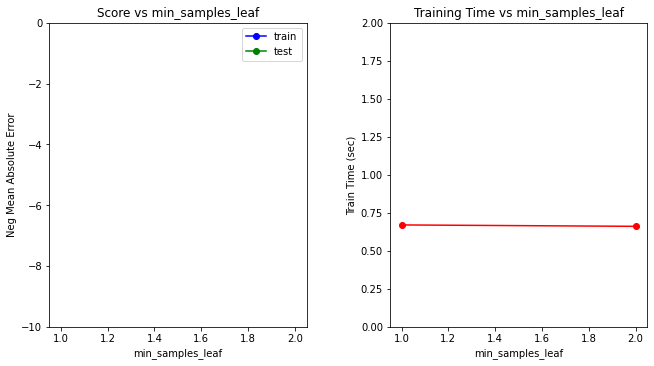

In [0]:
plot_results(rand_forest)